
#**LAB 2 (2nd September 2024)**
#TOPICS COVERED : Logistic Regression, Neural Networks
# Submission Deadline : 02-09-2024 11:59:59 PM (Midnight)
# Submission Link : https://forms.gle/FkhwWQUP4uzYRd3X6
# Please Note : Format of your file being uploaded is (BITS-ID_LAB NO, e.g. 202xAXPS1069_Lab_2.ipynb)

*Please submit the running code only with the necessary libraries.*


# Deep Learning Lab 2

# There are 4 graded questions at the end of this lab sheet. Cells marked  **Graded Question** with appropriate code and submit it in the following form:

Form link - https://forms.gle/FkhwWQUP4uzYRd3X6

Datasets: https://drive.google.com/drive/folders/14FHq7_1sK0ZjJCtXruk1fGu5il7-ubMO?usp=sharing



# Mention your Name and ID in the blanks below
## Name - Ankit Kumar
## ID - 2023H1030076P

In [1]:
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt

%matplotlib inline

# Logistic Regression

Consider the scenario where we have a classification problem where the dependent variable is categorical in nature and the independent variables are continuous in nature. Some examples are categorizing transactions as valid or fraudulent, tumors as malignant or benign, emails as spam or not spam. All these problems can be answered with a simple **Yes** or **No**, which is why they are called **binary classification problems**.

### Why not use Linear Regression?

Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequences.

Linear regression is unbounded, and this brings logistic regression into the picture.

To deal with outliers, logistic regression uses the sigmoid function.

The sigmoid function is defined as:
$$\sigma(z) = \frac{e^z}{e^z+1} = \frac{1}{1+e^{-z}}$$

Plotting it looks as follows:

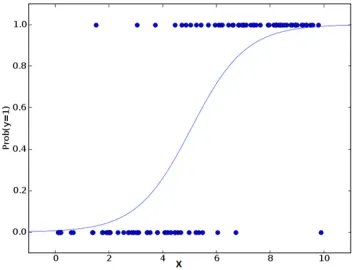

As we know from the previous class, $z$ or $h$ is our hypothesis, defined as:
$$ h=\theta_0+\theta_1X$$



# Cost Function

As we have to categorize the data into either 0 or 1, we use a new cost function which maximizes cost when data is wrongly classified and minimizes cost when data is classified properly. To achieve this functionality, we use the following function:
$$J=\frac{1}{m}\sum_{i=1}^m[-y_i\log(a_i)-(1-y_i)\log(1-a_i)]$$
Where,
$$a_i = \sigma(h_i)$$
and $y_i$ is the ground truth categorical value for element $i$.

Taking the derivative of this function with respect to $\theta_0$ and $\theta_1$, we get:
$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m}(A-Y)^T\cdot X$$

$$\frac{\partial J}{\partial \theta_0}=\frac{1}{m}\sum_{i=1}^{m}(a_i-y_i)$$

Where $X,A,Y$ are the vectorized versions of $x_i,a_i,y_i$ respectively.
$\frac{1}{m}$ is used to normalize across $m$ training samples.

$\log(a_i)\to 0$ when $a_i \to 1$ and $\log(1 - a_i)\to 0$ when $(a_i) \to 0$

The function L is used in the expression for the cost function J. This function L is called Binary Cross Entropy Loss Function, and the graph of the function is as displayed below. The value on the

$$L=[-y_i\log(a_i)-(1-y_i)\log(1-a_i)]$$

![Altr text](/home/shivam/Downloads/bcel.jpg)

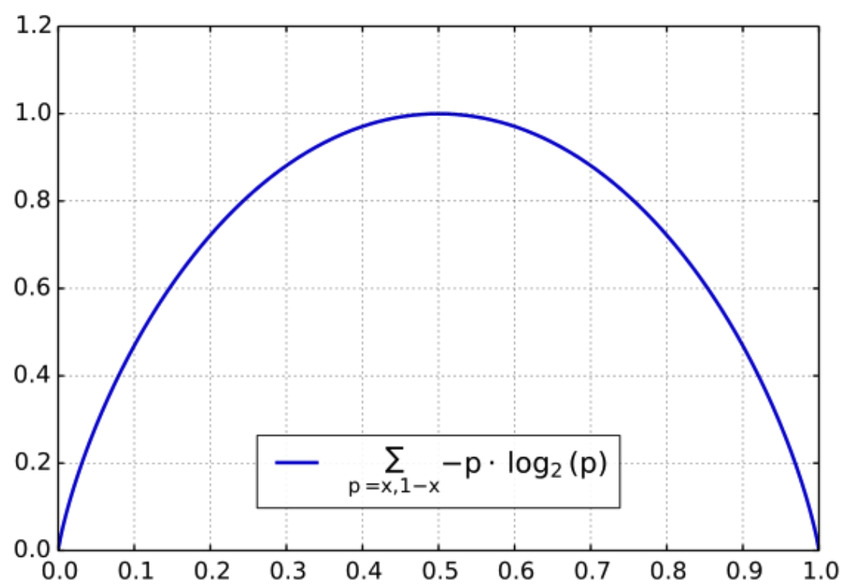

Image link - https://www.researchgate.net/publication/342520628/figure/fig2/AS:907606478553088@1593401655516/Graph-of-Binary-Cross-Entropy-Loss-Function-Here-Entropy-is-defined-on-Y-axis-and.ppm

# Data

We will use the cats vs non-cats dataset from last class.

In [2]:
def load_dataset():
    with h5py.File('D:\\DL lab\\Labsheet_2\\train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File("D:\\DL lab\\Labsheet_2\\test_catvnoncat.h5", "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x, train_y, test_x, test_y, classes = load_dataset()

In [4]:
train_x.shape

(209, 64, 64, 3)

# Preprocessing

We preprocess the code by flattening the image to a shape of (num_pixels_x * num_pixels_y * 3, 1), and scale all pixel values to become values between 0 and 1.

In [5]:
def preprocess(x):
    x = x.reshape(x.shape[0], -1).T
    x = x / 255
    return x

In [6]:
train_x = preprocess(train_x)
test_x = preprocess(test_x)

In [7]:
train_x.shape

(12288, 209)

# Helper Functions

## Sigmoid

We implement the sigmoid function or $\sigma (z) = \frac{1}{1 + e^{-z}}$

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

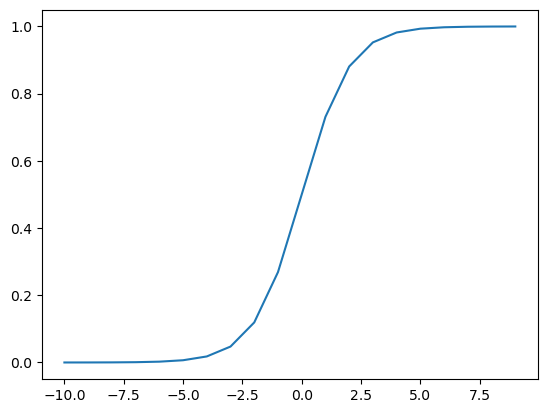

In [9]:
plt.plot([i for i in range(-10,10)], [sigmoid(i) for i in range(-10,10)])

We implement a function to initialize values of $\theta_0$ and $\theta_1$ as $b$ or bias and $w$ or weight. We initialize $w$ to be an array of zeros of size (num_pixels_x * num_pixels_y * 3, 1) and $b$ is initialized to 0.0

In [10]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.
    return w, b

Now we will compute cost and gradients in a function as per the following equations$$J=\frac{1}{m}\sum_{i=1}^m[-y_i\log(a_i)-(1-y_i)\log(1-a_i)]$$
$$\frac{\partial J}{\partial w} = \frac{1}{m}(A-Y)^T\cdot X$$

$$\frac{\partial J}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}(a_i-y_i)$$

In [11]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost

Now we will optimize the parameters $w$ and $b$ using the following equations:
$$w = w - \alpha \frac{\partial J}{\partial w}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

We will also give an option to print the cost once every 100 epochs or iterations

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

Now we will implement the prediction function, essentially defined as $$a = \sigma(wX + b)$$
We will also convert the continuous values between 0 and 1 to discrete values, 0 and 1. We determine this via a customizable threshold, currently at 0.5. Anything above this threshold is considered true or 1 else 0

In [13]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction

We will now define the model, within which we will perform all steps outlined above and train our model

$$(1-\frac{\sum_{i=0}^n |y^p_i-y_i|}{n})*100$$

In [14]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d

In [15]:
d = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [16]:
d['Y_prediction_train']

array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [17]:
train_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
d['costs'] # per 100 iterations

[0.6931471805599453,
 0.5845083636993086,
 0.46694904094655476,
 0.37600686694802077,
 0.3314632893282513,
 0.30327306747438293,
 0.2798795865826048,
 0.26004213692587574,
 0.24294068467796623,
 0.22800422256726066,
 0.21481951378449635,
 0.20307819060644985,
 0.1925442771670686,
 0.18303333796883503,
 0.17439859438448876,
 0.16652139705400335,
 0.15930451829756614,
 0.15266732471296504,
 0.1465422350398234,
 0.14087207570310162]

# **Graded question 1**

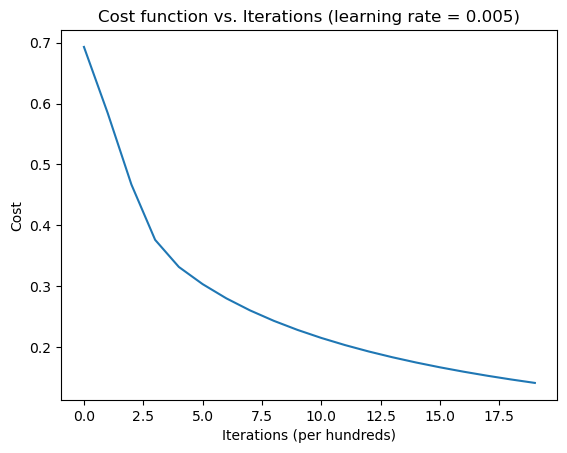

In [19]:
# Graded Question
# Plot the cost function vs number of iterations using pyplot (plt) from matplotlib
#SOlution
import matplotlib.pyplot as plt

#  `d` is the dictionary returned by your `model` function
def plot_cost_vs_iterations(d):
    costs = d["costs"]
    num_iterations = d["num_iterations"]

    # Plot the cost function
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title(f"Cost function vs. Iterations (learning rate = {d['learning_rate']})")
    plt.show()

# Assuming you have already run your model and have `d`
plot_cost_vs_iterations(d)


# Evaluation metrics for Classification

Precision is defined as the number of true positives divided by the number of predicted positives.
$$Precision=\frac{TP}{TP+FP}$$

Recall is defined as the number of true positives divided by the total number of actual positives.
$$Recall=\frac{TP}{TP+FN}$$

F1 Score is the harmonic mean of precision and recall.
$$F1 = 2*\frac{Precision * Recall}{Precision + Recall}$$
F1 score punishes extreme values more. It is best used when false positives and false negatives are equally undesirable outcomes.

# **Graded question 2**

In [20]:
# Graded Question
# Find Precision, Recall and F1 score for both the train and test predictions

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for the training set
precision_train = precision_score(train_y.T, d["Y_prediction_train"].T)
recall_train = recall_score(train_y.T, d["Y_prediction_train"].T)
f1_train = f1_score(train_y.T, d["Y_prediction_train"].T)

# Calculate precision, recall, and F1 score for the test set
precision_test = precision_score(test_y.T, d["Y_prediction_test"].T)
recall_test = recall_score(test_y.T, d["Y_prediction_test"].T)
f1_test = f1_score(test_y.T, d["Y_prediction_test"].T)

# Print the results for the training set
print("Train Precision: {:.4f}".format(precision_train))
print("Train Recall: {:.4f}".format(recall_train))
print("Train F1 Score: {:.4f}".format(f1_train))

# Print the results for the test set
print("\nTest Precision: {:.4f}".format(precision_test))
print("Test Recall: {:.4f}".format(recall_test))
print("Test F1 Score: {:.4f}".format(f1_test))


Train Precision: 0.9861
Train Recall: 0.9861
Train F1 Score: 0.9861

Test Precision: 0.8214
Test Recall: 0.6970
Test F1 Score: 0.7541


# There are 2 graded questions marked `# GRADED` in the following section. .

Download datasets for this lab from this link: https://drive.google.com/drive/folders/144TVoP81peoe5yY4vVH6WBXGVsCHDoRK?usp=sharing

In [21]:
import pandas as pd
import numpy as np
import torch

Loading the dataset

In [22]:
# y = f(x1, x2, x3, x4, ...)
# indep.csv contains values of x1, x2, x3, x4, .....
# dep.csv contains corresponding values of y

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# t_indep=pd.read_csv('/content/drive/MyDrive/DL_2024_Labs/indep.csv')
# t_indep=t_indep.drop(t_indep.columns[[0]],axis=1)
# t_dep=pd.read_csv('/content/drive/MyDrive/DL_2024_Labs/dep.csv')
# t_dep=t_dep.drop(t_dep.columns[[0]],axis=1)

### Data is loading from  system drive 

In [25]:
import pandas as pd

# Specify the file paths
indep_file_path = r"D:\DL lab\Labsheet_2\indep.csv"
dep_file_path = r"D:\DL lab\Labsheet_2\dep.csv"

# Load the CSV files
t_indep = pd.read_csv(indep_file_path)
t_indep = t_indep.drop(t_indep.columns[[0]], axis=1)

t_dep = pd.read_csv(dep_file_path)
t_dep = t_dep.drop(t_dep.columns[[0]], axis=1)

# Now t_indep and t_dep contain the loaded data from the specified files

In [26]:
print(t_indep)

      Age  SibSp  Parch   LogFare  Sex_male  Sex_female  Pclass_1  Pclass_2  \
0    22.0      1      0  2.110213         1           0         0         0   
1    38.0      1      0  4.280593         0           1         1         0   
2    26.0      0      0  2.188856         0           1         0         0   
3    35.0      1      0  3.990834         0           1         1         0   
4    35.0      0      0  2.202765         1           0         0         0   
..    ...    ...    ...       ...       ...         ...       ...       ...   
886  27.0      0      0  2.639057         1           0         0         1   
887  19.0      0      0  3.433987         0           1         1         0   
888  24.0      1      2  3.196630         0           1         0         0   
889  26.0      0      0  3.433987         1           0         1         0   
890  32.0      0      0  2.169054         1           0         0         0   

     Pclass_3  Embarked_C  Embarked_Q  Embarked_S  

In [27]:
print(t_dep)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


So PyTorch tensors allow us to use gradients and make life easier, so we'll convert these dataframe values into those


In [28]:
t_dep=torch.tensor(t_dep.values,dtype=torch.float)
t_indep=torch.tensor(t_indep.values,dtype=torch.float)

In [29]:
print(t_indep)

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])


In [30]:
print(t_dep)

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [31]:
print(t_indep.size())

torch.Size([891, 12])


In [32]:
print(t_dep.size())

torch.Size([891, 1])


Setting up a Linear Model

In [33]:
# a*x1 + b*x2 + c*x3 + d*x4 .....
# the coeffs below are a,b,c,d,.....

In [34]:
t_indep.size()

torch.Size([891, 12])

In [35]:
torch.manual_seed(42)

n_coeff=t_indep.size()[1]
coeffs=torch.rand(n_coeff)-0.5 #random values in range -0.5 to 0.5
coeffs


tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936])

Normalizing values in each column

This is done to prevent any one column dominating the prediction results, since a linear model is row*coeffs, very high initial values in some columns will lead to some columns dominating the final answer which we don't want

In [36]:
#finds the maximum value in each column (feature) of the t_indep tensor.
vals,indices = t_indep.max(dim=0) #dim=0: Specifies that the operation should be performed along the columns.
t_indep = t_indep / vals  #v cool line of code, think about why

In [37]:
vals

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000])

In [38]:
indices

tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0])

In [39]:
# t_indep(891*12) vals(1*12) matrix
# for i in range(12):
#   t_indep[i] = t_indep[i]/vals[i]

In [40]:
#Each feature in a row of t_indep is multiplied by its corresponding coefficient in coeffs.

#The sum represents the weighted sum of the features for each data point, which
#is the predicted value for that data point.

"""This line computes the predicted values (preds) for each data point in your dataset
by taking the dot product of the feature matrix (t_indep) and the coefficient vector (coeffs).
For example, if t_indep has 5 rows (data points) and 12 columns (features),
and coeffs has 12 elements (one for each feature),
the result will be a tensor preds with 5 elements,
each representing the predicted value for a corresponding data point."""

'This line computes the predicted values (preds) for each data point in your dataset\nby taking the dot product of the feature matrix (t_indep) and the coefficient vector (coeffs).\nFor example, if t_indep has 5 rows (data points) and 12 columns (features),\nand coeffs has 12 elements (one for each feature),\nthe result will be a tensor preds with 5 elements,\neach representing the predicted value for a corresponding data point.'

In [41]:
preds=(t_indep*coeffs).sum(axis=1)

In [42]:
preds[0:10]


tensor([0.7371, 0.0391, 0.9206, 0.4639, 0.7542, 1.0459, 0.2906, 0.7982, 0.9089,
        0.3994])

In [43]:

# Alternate way to do the same thing
torch.matmul(t_indep,coeffs)[:10]

tensor([0.7371, 0.0391, 0.9206, 0.4639, 0.7542, 1.0459, 0.2906, 0.7982, 0.9089,
        0.3994])

In [44]:
# Let's see the above operations more clearly

print('First 5 rows of t_indep')
print(t_indep[:5,:].numpy()) #select the first 5 rows and all columns
print('\n vals')
print(vals)
print('\n indices')
print(indices)

First 5 rows of t_indep
[[0.275      0.125      0.         0.3381255  1.         0.
  0.         0.         1.         0.         0.         1.        ]
 [0.475      0.125      0.         0.6858916  0.         1.
  1.         0.         0.         1.         0.         0.        ]
 [0.325      0.         0.         0.35072672 0.         1.
  0.         0.         1.         0.         0.         1.        ]
 [0.4375     0.125      0.         0.63946277 0.         1.
  1.         0.         0.         0.         0.         1.        ]
 [0.4375     0.         0.         0.35295528 1.         0.
  0.         0.         1.         0.         0.         1.        ]]

 vals
tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000])

 indices
tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0])


In [45]:
t_indep = t_indep / vals  #v cool line of code, think about why

In [46]:
print('First 5 rows of t_indep')
# print(t_indep[:5,:].numpy())
print(t_indep[:5,:])

First 5 rows of t_indep
tensor([[0.0034, 0.0156, 0.0000, 0.0542, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.0059, 0.0156, 0.0000, 0.1099, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000,
         1.0000, 0.0000, 0.0000],
        [0.0041, 0.0000, 0.0000, 0.0562, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.0055, 0.0156, 0.0000, 0.1025, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000],
        [0.0055, 0.0000, 0.0000, 0.0566, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000]])


In [47]:
preds=(t_indep*coeffs)

In [48]:
# ax11 bx21 cx31 dx41 ...... 12 columns towards the right
# ax12 bx22 cx32 dx42
# ...... 891 rows this way downwards

In [49]:
# print(preds)
print(preds.shape)
print(t_indep.shape)
print(coeffs.shape)  # initial coeffs..

torch.Size([891, 12])
torch.Size([891, 12])
torch.Size([12])


In [50]:
preds=preds.sum(axis=1)

In [51]:
print(preds.shape)

torch.Size([891])


In [52]:
preds[0:10]

tensor([ 0.4575, -0.4501,  0.6626,  0.0067,  0.4529,  0.7937, -0.2094,  0.4776,
         0.6598,  0.0756])

In [53]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.5414)

Making functions for loss and predictions

In [54]:
def pred(coeffs,indeps):
    return (indeps*coeffs).sum(axis=1)

def calc_loss(coeffs,indeps,deps):
    return torch.abs(pred(coeffs,indeps)-deps).mean() #calculates the mean absolute error between the predicted values and the actual values.

Doing gradient descent

In [55]:
coeffs.requires_grad_() #enables gradients for coeffs tensor
 #It allows PyTorch to track operations on the coeffs tensor so that gradients
 #can be computed during backpropagation.
 #his is essential for training neural networks, as it allows the model to
 #update the coefficients based on the computed gradients during the optimization process.

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936], requires_grad=True)

In [56]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5414, grad_fn=<MeanBackward0>)

In [57]:
loss.backward() #calculates gradients

#erforms backpropagation to compute the gradients of the loss with respect
#to the model parameters (in this case, the coeffs tensor).

In [58]:
coeffs.grad

tensor([-4.9219e-04,  5.8809e-04,  1.4738e-04, -8.9413e-03, -7.7758e-02,
         3.6141e-02, -1.8433e-01,  3.4146e-02,  1.0857e-01, -1.3461e-01,
         4.7648e-02,  4.5347e-02])

Each time you call loss.backwards, newly calculated gradients are accumulated (or added to current gradients)

We use tensor.grad.zero_() to make the gradients zero after each step

In [59]:
coeffs.grad.zero_() # making coeffs zero for the coeffs tensor
loss=calc_loss(coeffs,t_indep,t_dep) # calculating the loss
loss.backward() # backpropagation step
# torch.no_grad means that we will not change the values of any gradients for any tensor inside this loop
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1) # coeffs_new = coeffs_old - learning_rate * gradients
    coeffs.grad.zero_()
    print(calc_loss(coeffs,t_indep,t_dep))

tensor(0.5343)


Making functions for this

In [60]:
def update_coeffs(coeffs,lr):
    coeffs.sub_(coeffs.grad*lr)
    coeffs.grad.zero_()

In [61]:
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,t_indep,t_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs,lr)
        print(f"{loss:.3f}", end="; ")


In [62]:
def init_coeffs():
    return (torch.rand(n_coeff)-0.5).requires_grad_()

In [63]:
def train_model(epochs=30000, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [64]:
train_model(epochs=30)

0.522; 0.521; 0.520; 0.520; 0.519; 0.518; 0.518; 0.517; 0.516; 0.515; 0.515; 0.514; 0.513; 0.513; 0.512; 0.511; 0.511; 0.510; 0.509; 0.508; 0.508; 0.507; 0.506; 0.506; 0.505; 0.504; 0.503; 0.503; 0.502; 0.501; 

tensor([-0.4629,  0.1384,  0.2409, -0.2252, -0.2690, -0.3090,  0.5060,  0.3062,
         0.2689, -0.3826,  0.2043,  0.3120], requires_grad=True)

In [65]:
print(coeffs.grad) #shows us that the model has pretty much converged

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


Building a full neural network

In [66]:
import torch.nn.functional as F

def preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1) # '@' is an optimized matrix product in python
    res = res@l2 + const
    return torch.sigmoid(res)



In [67]:
def calc_loss(coeffs,indeps,deps):
    return torch.abs(preds(coeffs,indeps)-deps).mean()

In [68]:
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,t_indep,t_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs,lr)
        print(f"{loss:.3f}", end="; ")

In [69]:
def train_model(epochs=300, lr=0.1):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [70]:
def init_coeffs(n_hidden=60):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [71]:
def update_coeffs(coeffs, lr=0.1):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [72]:
coeffs=train_model()
# update_coeffs(l1)


0.524; 0.520; 0.518; 0.516; 0.515; 0.513; 0.511; 0.510; 0.508; 0.506; 0.504; 0.502; 0.500; 0.498; 0.496; 0.494; 0.492; 0.490; 0.488; 0.486; 0.483; 0.481; 0.479; 0.477; 0.475; 0.473; 0.471; 0.468; 0.466; 0.464; 0.462; 0.460; 0.457; 0.455; 0.453; 0.451; 0.448; 0.446; 0.444; 0.442; 0.439; 0.437; 0.435; 0.432; 0.430; 0.428; 0.426; 0.423; 0.421; 0.419; 0.416; 0.414; 0.412; 0.409; 0.407; 0.404; 0.402; 0.400; 0.397; 0.395; 0.392; 0.390; 0.388; 0.385; 0.383; 0.380; 0.378; 0.375; 0.373; 0.371; 0.368; 0.366; 0.363; 0.361; 0.359; 0.356; 0.354; 0.352; 0.349; 0.347; 0.345; 0.342; 0.340; 0.338; 0.336; 0.334; 0.332; 0.329; 0.327; 0.325; 0.323; 0.321; 0.319; 0.317; 0.315; 0.314; 0.312; 0.310; 0.308; 0.306; 0.305; 0.303; 0.301; 0.300; 0.298; 0.297; 0.295; 0.294; 0.292; 0.291; 0.290; 0.288; 0.287; 0.285; 0.284; 0.283; 0.282; 0.281; 0.279; 0.278; 0.277; 0.276; 0.275; 0.274; 0.273; 0.272; 0.271; 0.270; 0.269; 0.268; 0.267; 0.266; 0.265; 0.265; 0.264; 0.263; 0.262; 0.261; 0.261; 0.260; 0.259; 0.259; 0.258;

In [73]:
def acc(coeffs): return (t_dep.bool()==(preds(coeffs,t_indep)>0.5)).float().mean()



In [74]:
acc(coeffs)

tensor(0.7868)

loss.backwards() on a linear model
ax + by + cz + dw.....

S = ax + by + cz + dw.....

delta = partial derivative of S wrt a
a_new = a_old - lr * delta

# **Graded questions 3 and 4**


Evaluative Component:
3. Create a train/test split from the dataset (#GRADED)

4. Evaluate the testing split and it's accuracy (#GRADED)

### 3. Create a train/test split from the dataset (#GRADED)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t_indep, t_dep, test_size=0.2, random_state=42)

In [76]:
print(X_train)

tensor([[0.0071, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0036, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0050, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.0064, 0.0312, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0022, 0.0156, 0.0556,  ..., 0.0000, 0.0000, 1.0000],
        [0.0033, 0.0000, 0.0278,  ..., 0.0000, 0.0000, 1.0000]])


In [77]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [78]:
print(X_test)

tensor([[3.7500e-03, 1.5625e-02, 2.7778e-02,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.8438e-03, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [3.1250e-03, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [5.9375e-03, 1.5625e-02, 1.3889e-01,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [2.6563e-03, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [6.2500e-04, 1.5625e-02, 2.7778e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])


In [79]:
print(y_test)

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
      

### 4. Evaluate the testing split and it's accuracy (#GRADED)

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the file paths
indep_file_path = r"D:\DL lab\Labsheet_2\indep.csv"
dep_file_path = r"D:\DL lab\Labsheet_2\dep.csv"

# Load the CSV files
t_indep = pd.read_csv(indep_file_path)
t_indep = t_indep.drop(t_indep.columns[[0]], axis=1)

t_dep = pd.read_csv(dep_file_path)
t_dep = t_dep.drop(t_dep.columns[[0]], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(t_indep, t_dep, test_size=0.2, random_state=42)

# Convert the DataFrames to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



In [81]:
import torch

# Convert the NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train,  dtype=torch.float)
X_test_tensor = torch.tensor(X_test,  dtype=torch.float)
y_train_tensor = torch.tensor(y_train,  dtype=torch.float)
y_test_tensor = torch.tensor(y_test,  dtype=torch.float)

In [82]:
y_train_tensor = y_train_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

In [83]:
# Initialize the coefficients for the neural network
def init_coeffs(n_features, n_hidden=60):
    layer1 = (torch.rand(n_features, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

# Predict function using the coefficients
def preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps @ l1)  # '@' is matrix multiplication
    res = res @ l2 + const
    return torch.sigmoid(res)

# Calculate the loss function
def calc_loss(coeffs, indeps, deps):
    return torch.abs(preds(coeffs, indeps) - deps).mean()

# Update the coefficients with gradient descent
def update_coeffs(coeffs, lr=0.1):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

# Perform one epoch of training
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, X_train_tensor, y_train_tensor)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)
    return loss.item()

# Train the model
def train_model(epochs=30000, lr=0.1, n_hidden=60):
    torch.manual_seed(442)
    coeffs = init_coeffs(X_train_tensor.shape[1], n_hidden=n_hidden)
    for i in range(epochs):
        loss = one_epoch(coeffs, lr=lr)
        if i % 500 == 0:  # Print loss every 50 epochs
            print(f"Epoch {i}, Loss: {loss:.4f}")
    return coeffs

# Function to calculate accuracy
def calculate_accuracy(coeffs, X_data, y_data):
    predictions = preds(coeffs, X_data)
    predicted_classes = (predictions >= 0.5).float()  # Convert probabilities to binary 0/1 classes
    accuracy = (predicted_classes == y_data).float().mean()  # Calculate accuracy
    return accuracy.item()

In [84]:
coeffs = train_model()

Epoch 0, Loss: 0.5687
Epoch 500, Loss: 0.3190
Epoch 1000, Loss: 0.3062
Epoch 1500, Loss: 0.2849
Epoch 2000, Loss: 0.2409
Epoch 2500, Loss: 0.1889
Epoch 3000, Loss: 0.1855
Epoch 3500, Loss: 0.1829
Epoch 4000, Loss: 0.1782
Epoch 4500, Loss: 0.1752
Epoch 5000, Loss: 0.1731
Epoch 5500, Loss: 0.1708
Epoch 6000, Loss: 0.1694
Epoch 6500, Loss: 0.1685
Epoch 7000, Loss: 0.1676
Epoch 7500, Loss: 0.1669
Epoch 8000, Loss: 0.1663
Epoch 8500, Loss: 0.1658
Epoch 9000, Loss: 0.1653
Epoch 9500, Loss: 0.1649
Epoch 10000, Loss: 0.1646
Epoch 10500, Loss: 0.1642
Epoch 11000, Loss: 0.1639
Epoch 11500, Loss: 0.1636
Epoch 12000, Loss: 0.1632
Epoch 12500, Loss: 0.1627
Epoch 13000, Loss: 0.1623
Epoch 13500, Loss: 0.1618
Epoch 14000, Loss: 0.1614
Epoch 14500, Loss: 0.1612
Epoch 15000, Loss: 0.1609
Epoch 15500, Loss: 0.1606
Epoch 16000, Loss: 0.1605
Epoch 16500, Loss: 0.1602
Epoch 17000, Loss: 0.1600
Epoch 17500, Loss: 0.1598
Epoch 18000, Loss: 0.1597
Epoch 18500, Loss: 0.1596
Epoch 19000, Loss: 0.1594
Epoch 1950

In [85]:
train_accuracy = calculate_accuracy(coeffs, X_train_tensor, y_train_tensor)
test_accuracy = calculate_accuracy(coeffs, X_test_tensor, y_test_tensor)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 84.27%
Test Accuracy: 80.45%


In [ ]:
## if we increase the number of layer in neural network
## for more accuracy we can use more layer in neural network.